# In Hospital Mortality Prediction

**Dataset:** In Hospital Mortality Prediction Dataset from MIMIC-III database

**Source:** https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction

**Motivation/Goal:**

The goal of the project is to create a classification model to classify whether a patient will experience in-hospital mortality or not, based on the data obtained from patients admitted to the Intensive Care Unit for Heart Failure. The models focused on are Logistic Regression, Decision tree, and K-Nearest Neighbors. EDA, Feature Selection, and Dimensionality Reduction will be used to manipulate the dataset before modeling.

Additionally, categorical variables will be used to stratify the data into groups so that we can perform hypothesis testing and test classification model performance over these different groups. The categorical variables to be analyzed will be determined using Random Forest. 

**Dataset Variables:**

group, ID, outcome, age, gendera, BMI, hypertensive, atrialfibrillation, CHD with no MI, diabetes, deficiencyanemias, depression, Hyperlipemia, Renal failure, COPD, heart rate, Systolic blood pressure, Diastolic blood pressure, Respiratory rate, temperature, SP O2, Urine output, hematocrit, RBC, MCH, MCHC, MCV, RDW, Leucocyte, Platelets, Neutrophils, Basophils, Lymphocyte, PT, INR, NT-proBNP, Creatine kinase, Creatinine, Urea nitrogen, glucose, Blood potassium, Blood sodium, Blood calcium, Chloride, Anion gap, Magnesium ion, PH, Bicarbonate, Lactic acid, PCO2, EF



### Libraries

In this part, we are going to import all the necessary libraries that we will be using in our whole project.

In [1]:
#libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import eli5
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.feature_selection import  SelectKBest,f_classif
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

## Data Loading & Preprocessing
We have already defined which dataset we are going to use and what problems we will be solving. After choosing the dataset and defining the problem next step is Data loading and preprocesing. That means reading the raw data and doing a simple analysis of that. We’re going to check the basic details of the data frame below. We will be analyzing how many rows & columns are available, what is the column’s name, and what are the data types of each column. 

In [4]:
# Reading Data file
df = pd.read_csv("data01.csv")
df.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

In [5]:
# Checking shape of data
df.shape

(1177, 51)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

Now we are going to change categorical data to a categorical data type. We must change it because it will help us with our models. Then we will change some variables’ names. 

In [7]:
#Rename column name
df.rename({'gendera': 'gender'}, inplace=True, axis=1)


In [8]:
#converting catagorical columns to category data type.
columns_to_category= ['gender','hypertensive','atrialfibrillation','CHD with no MI','diabetes','deficiencyanemias','depression','Hyperlipemia','Renal failure','COPD']
df[columns_to_category]= df[columns_to_category].astype('category')

In [9]:
# Renaming columns name
columns = df.columns
new_cols =[]
c1= {}
for col in columns:
    res=col.replace(" ","_")
    c1[col] =res
df.rename(columns=c1, inplace=True)    

In [10]:
# New renamed columns.
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gender', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal_failure', 'COPD', 'heart_rate',
       'Systolic_blood_pressure', 'Diastolic_blood_pressure',
       'Respiratory_rate', 'temperature', 'SP_O2', 'Urine_output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine_kinase', 'Creatinine', 'Urea_nitrogen',
       'glucose', 'Blood_potassium', 'Blood_sodium', 'Blood_calcium',
       'Chloride', 'Anion_gap', 'Magnesium_ion', 'PH', 'Bicarbonate',
       'Lactic_acid', 'PCO2', 'EF'],
      dtype='object')

 __Initial observation__

There are 1177 records and 51 columns are present. There is a mixture of Integer and float datatypes present. The dataset does not contain categorical features that are represented as string labels (all values are numeric). Because of this, the datatype of certain numeric rows were converted to category data types. 

Additionally, it is observed that there are missing values present in a subset of the columns.

We need to predict presence (value 1) or absence (value 0) of outcome in the patient which are given in target column, outcome. Since the data is labeled with a discrete outcome, we can conclude that this is supervised learning, more specifically binary classification modeling.

### Data Cleaning
Data cleaning is the most important step of Preprocessing. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset.

In [11]:
# Checking for Null values count.
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gender                        0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD_with_no_MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal_failure                 0
COPD                          0
heart_rate                   13
Systolic_blood_pressure      16
Diastolic_blood_pressure     16
Respiratory_rate             13
temperature                  19
SP_O2                        13
Urine_output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

<AxesSubplot:>

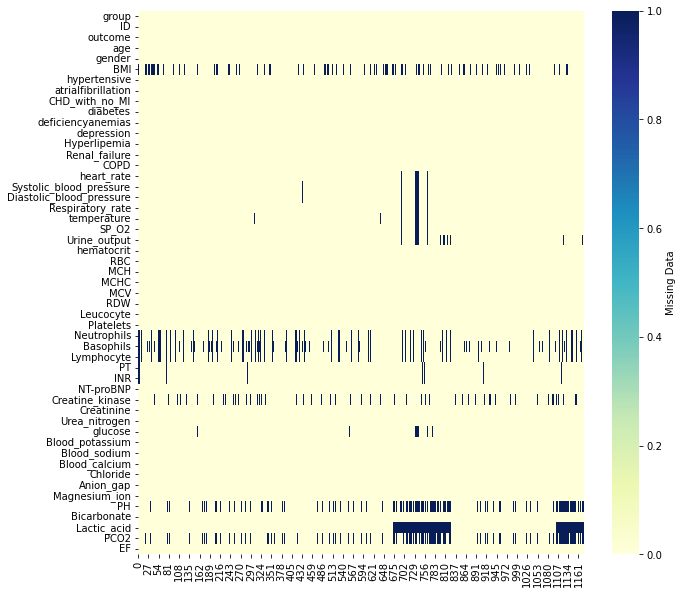

In [12]:
#Visualize nulls
plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},vmax = 1, vmin= 0)

In [13]:
# We don't need the group and ID in our model
df.drop(['group','ID'],axis=1,inplace=True)

In [14]:
# Droping duplicate value
df.drop_duplicates(inplace=True)

In [15]:
# Droping columns with 1 unique value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

After checking for null values in each of the features, it is observed that there is one datapoint with an outcome of null. This datapoint will be removed since we do not know the real-world outcome for this patient. 

In [16]:
# Cheking for unique value in outcome
df['outcome'].unique()

array([ 0.,  1., nan])

In [17]:
# droping the null value from outcome variable
df = df.dropna(subset=['outcome'])

__Statistical summery:__

Summary statistics summarize and provide information about our sample data. It tells us something about the values in our data set. This includes where the mean lies and whether our data is skewed.

In [18]:
df.describe()

outcome          age         BMI   heart_rate  \
count  1176.000000  1176.000000  962.000000  1164.000000   
mean      0.135204    74.047619   30.188278    84.575848   
std       0.342087    13.437241    9.325997    16.018701   
min       0.000000    19.000000   13.346801    36.000000   
25%       0.000000    65.000000   24.326461    72.371250   
50%       0.000000    77.000000   28.312474    83.610799   
75%       0.000000    85.000000   33.633509    95.907143   
max       1.000000    99.000000  104.970366   135.708333   

       Systolic_blood_pressure  Diastolic_blood_pressure  Respiratory_rate  \
count              1161.000000               1161.000000       1164.000000   
mean                117.995035                 59.534497         20.801511   
std                  17.367618                 10.684681          4.002987   
min                  75.000000                 24.736842         11.137931   
25%                 105.391304                 52.173913         17.925694   
50%                 116.128205                 58.461538         20.372308   
75%                 128.625000                 65.464286         23.391200   
max                 203.000000                107.000000         40.900000   

       temperature        SP_O2  Urine_output  ...  Blood_sodium  \
count  1158.000000  1164.000000   1141.000000  ...   1176.000000   
mean     36.677286    96.272900   1899.276512  ...    138.897009   
std       0.607558     2.298002   1272.363631  ...      4.146172   
min      33.250000    75.916667      0.000000  ...    114.666667   
25%      36.286045    95.000000    980.000000  ...    136.666667   
50%      36.650794    96.452273   1675.000000  ...    139.250000   
75%      37.021991    97.917500   2500.000000  ...    141.600000   
max      39.132478   100.000000   8820.000000  ...    154.736842   

       Blood_calcium     Chloride    Anion_gap  Magnesium_ion          PH  \
count    1175.000000  1176.000000  1176.000000    1176.000000  885.000000   
mean        8.501789   102.292048    13.923755       2.120286    7.378532   
std         0.571683     5.334562     2.653463       0.251608    0.067320   
min         6.700000    80.266667     6.636364       1.400000    7.090000   
25%         8.150000    99.000000    12.250000       1.955556    7.334615   
50%         8.500000   102.516667    13.666667       2.092582    7.380000   
75%         8.869375   105.571429    15.404167       2.241964    7.430000   
max        10.950000   122.526316    25.500000       4.072727    7.580000   

       Bicarbonate  Lactic_acid        PCO2           EF  
count  1176.000000   948.000000  883.000000  1176.000000  
mean     26.912116     1.853426   45.535382    48.710034  
std       5.169696     0.983819   12.711271    12.872604  
min      12.857143     0.500000   18.750000    15.000000  
25%      23.452020     1.200000   37.038462    40.000000  
50%      26.500000     1.600000   43.000000    55.000000  
75%      29.881250     2.200000   50.585784    55.000000  
max      47.666667     8.333333   98.600000    75.000000  

[8 rows x 39 columns]

__How to decide which imputation technique to use?__
 - One of the techniques is mean imputation in which the missing values are replaced with the mean value of the entire feature column. In our case, the data may be skewed as shown in the previous section. In such cases, it may not be a good idea to use mean imputation for replacing the missing values. Note that imputing missing data with mean values can only be done with numerical data.
 - Another technique is median imputation in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values, since it is less affected by outliers. Note that imputing missing data with median value can only be done with numerical data.
 
The following box plots and distribution plots will be used to determine which imputation technique is applicable for this dataset. 

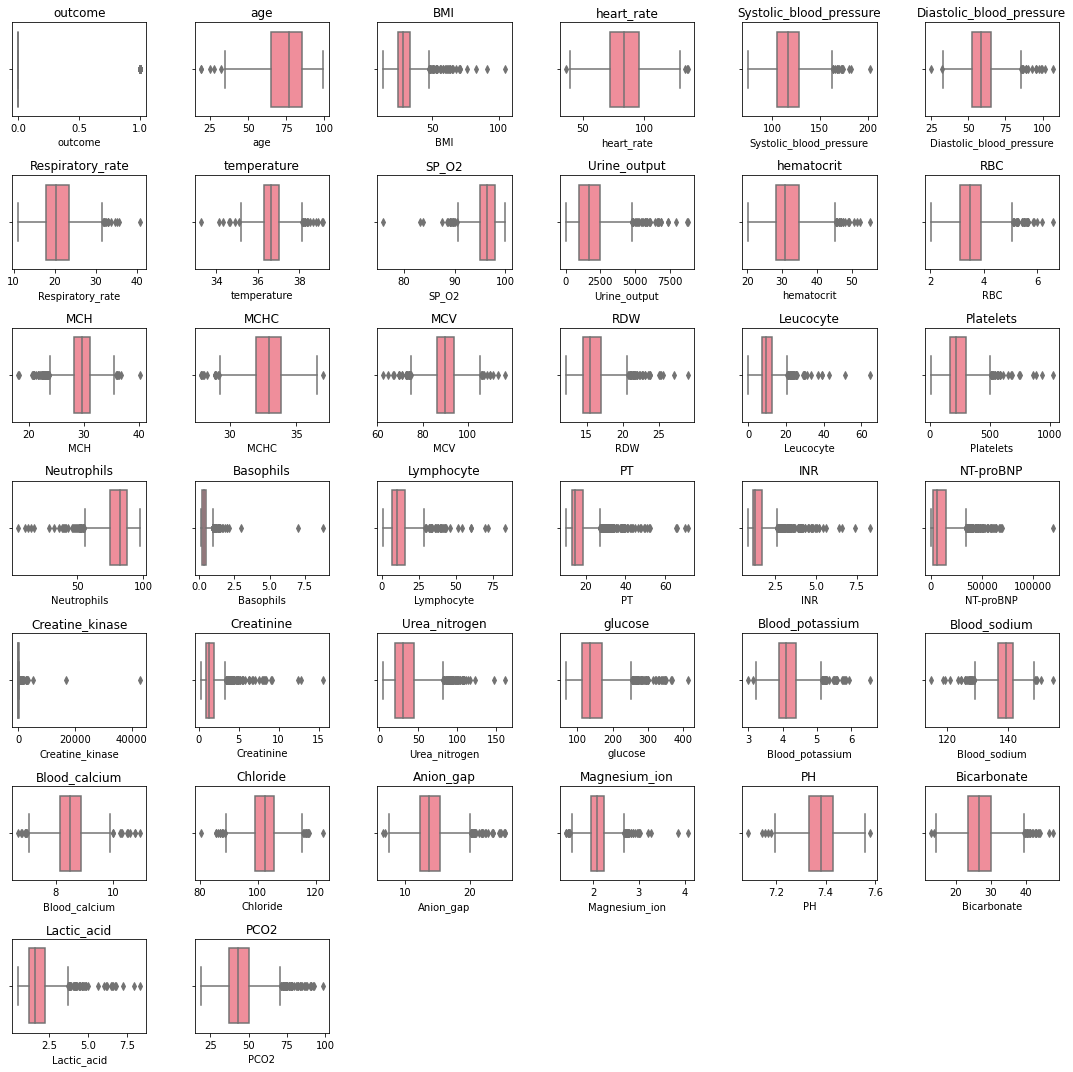

In [19]:
#define color
pal =sns.set_palette(sns.color_palette(['#FF7E8F']))
#set up subplot variables for ease of visualization
fig, ax = plt.subplots(7,6,figsize=(15,15))
ax = ax.ravel()
pos = 0
#plot boxplots with data points outside of the lower and upper bounds marked 
for column in df.columns:
    if (df[column].dtype != "category"):
        sns.boxplot(data = df, x = column, ax=ax[pos],palette=pal)
        ax[pos].set_title(column)
        pos+=1

#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

After observing the box plot we can see that most of our features are skewed. And we can finalize we can use median imputation in our case.

In [20]:
# filling null with median
df = df.fillna(df.median(numeric_only=True))

In [21]:
# checking for null value count again.
df.isnull().sum()

outcome                     0
age                         0
gender                      0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

<AxesSubplot:>

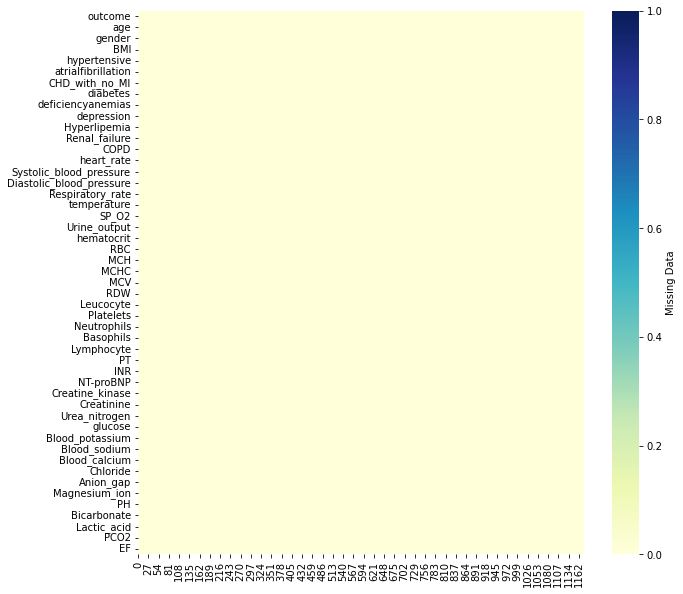

In [22]:
#visualize nulls
plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},vmax = 1, vmin= 0)

Now we can see that, here is no null value.

## EDA - Exploratory data analysis
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions. EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them.

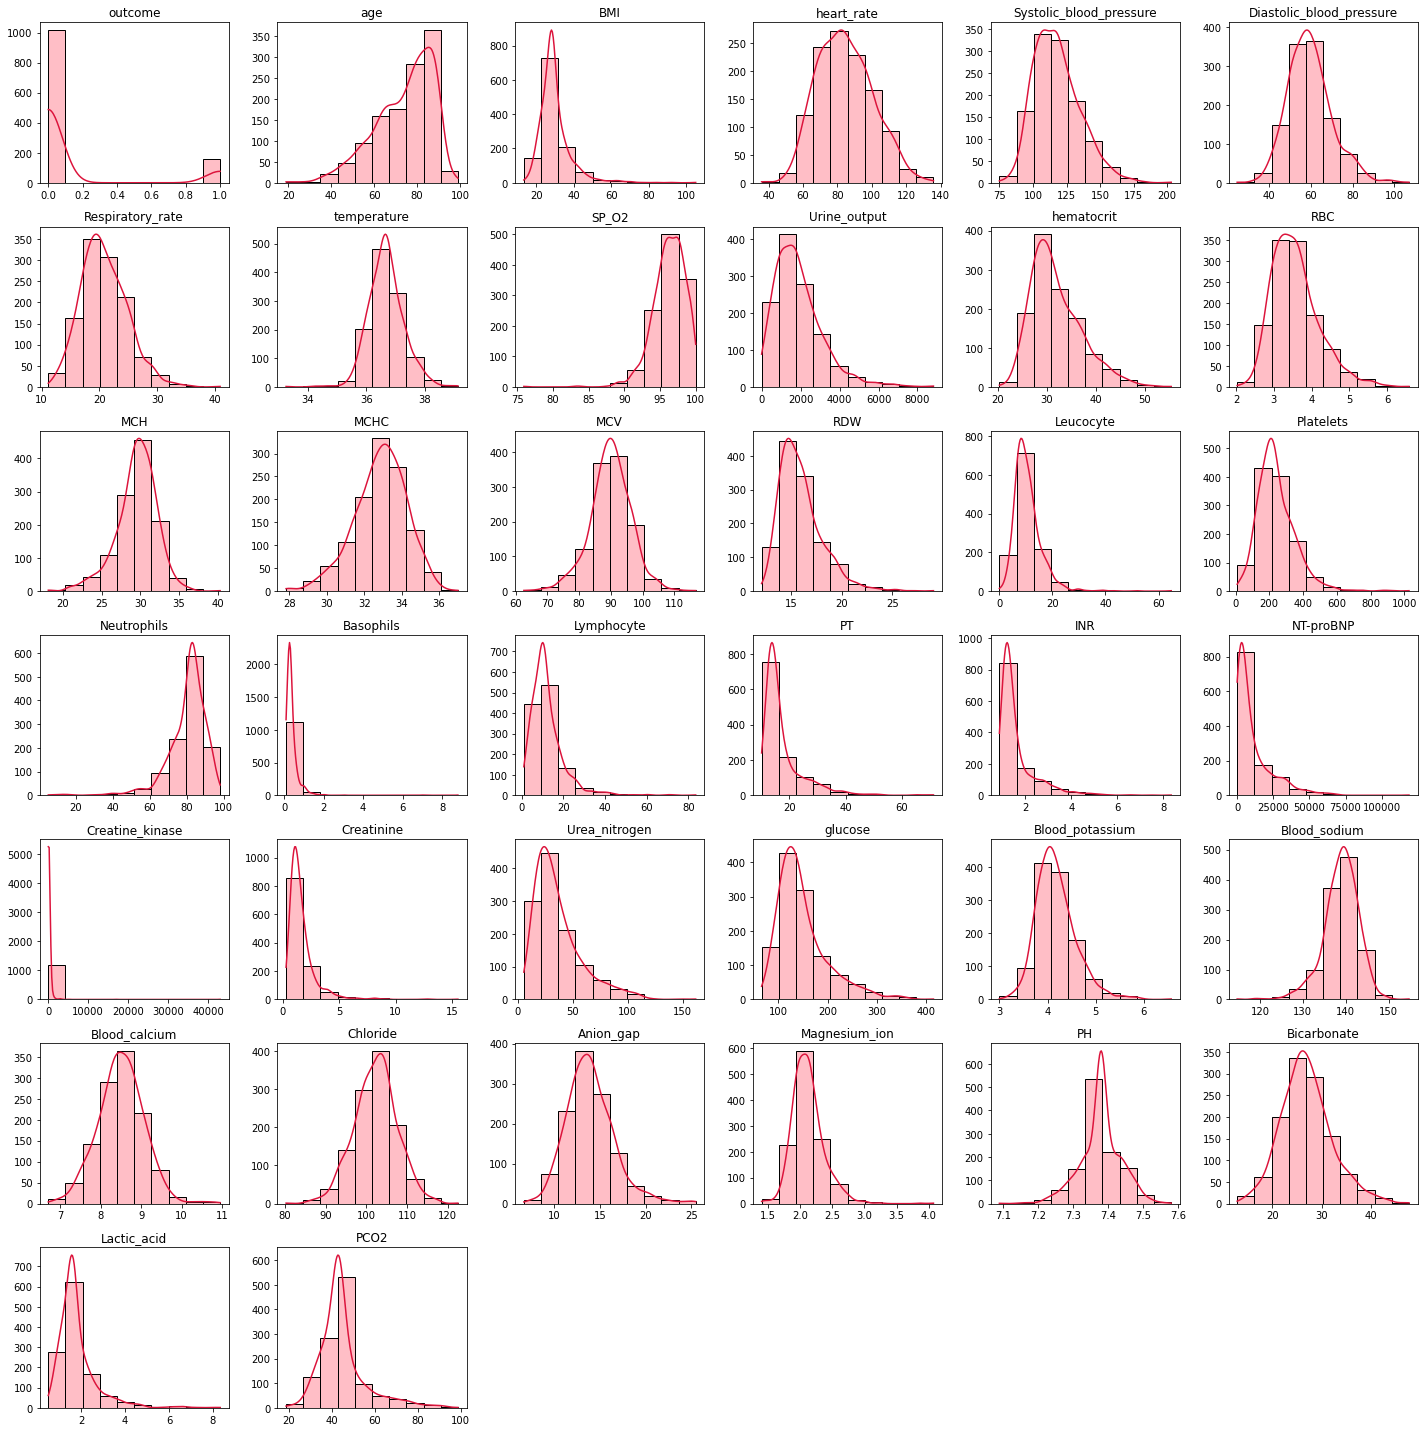

In [23]:
#set up subplot variables for ease of visualization
pal =sns.set_palette(sns.color_palette(['#FF7E8F']))
fig, ax = plt.subplots(7,6,figsize=(20,20))
ax = ax.ravel()
pos = 0
n = df.shape[0]

#plot Hisograms with kde 
for column in df.select_dtypes(exclude="category").columns:
    w = (df[column].max() - df[column].min())/np.sqrt(n)
    sns.histplot(data = df[column], ax=ax[pos], kde=True, bins=10).set_title(column)
    ax[pos].set(xlabel = None, ylabel=None)
    ax[pos].lines[0].set_color('crimson')
    pos+=1


#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

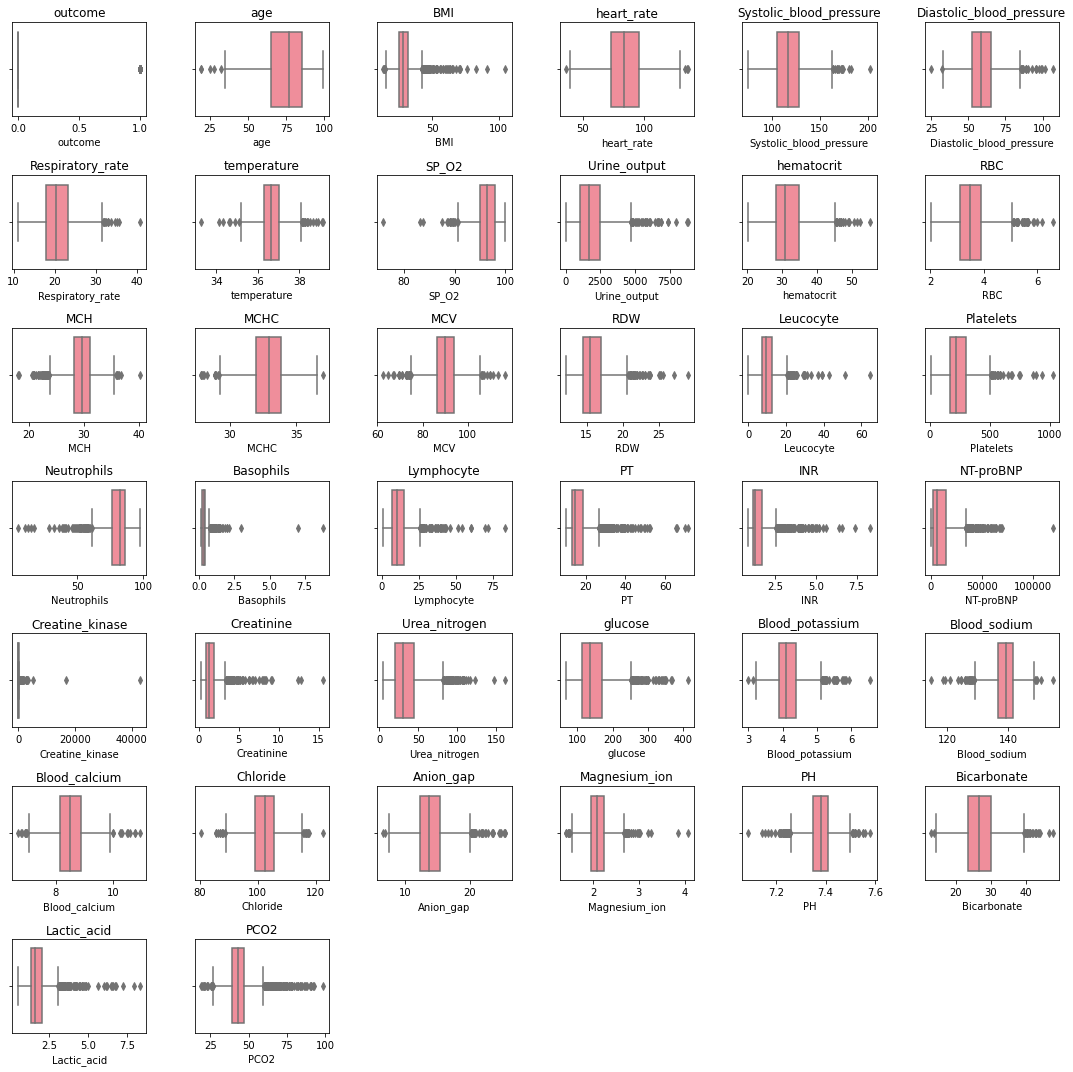

In [24]:
#define color
pal =sns.set_palette(sns.color_palette(['#FF7E8F']))
#set up subplot variables for ease of visualization
fig, ax = plt.subplots(7,6,figsize=(15,15))
ax = ax.ravel()
pos = 0
#plot boxplots with data points outside of the lower and upper bounds marked 
for column in df.columns:
    if (df[column].dtype != "category"):
        sns.boxplot(data = df, x = column, ax=ax[pos],palette=pal)
        ax[pos].set_title(column)
        pos+=1

#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

__When should I remove an outlier from my dataset?__

It’s best to remove outliers only when you have a sound reason for doing so. Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling. An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly. If it can be determined that an outlying point is in fact erroneous, then the outlying value should be deleted from the analysis (or corrected if possible).

From the boxplots, we can see we have some outliers in our data frame. The below ranges were determined by selecting the most extreme datapoints, and removing them. 

In [25]:
# Removing outliers
df = df[df['age'] >35]
df = df[df['BMI'] < 50]
df = df[df['heart_rate'] < 130]
df = df[df['Systolic_blood_pressure'] < 170]
df = df[df['Diastolic_blood_pressure'] < 95]
df = df[df['Diastolic_blood_pressure'] > 30]
df = df[df['Respiratory_rate'] < 33]
df = df[df['temperature'] < 38.5]
df = df[df['temperature'] > 34.5]
df = df[df['SP_O2'] > 88]
df = df[df['Urine_output'] < 6000]
df = df[df['hematocrit'] < 50]
df = df[df['RBC'] < 5.8]
df = df[df['MCH'] > 20]
df = df[df['MCH'] < 40]
df = df[df['MCHC'] >28]
df = df[df['MCHC'] <37]
df = df[df['MCV'] > 68]
df = df[df['MCV'] < 111]
df = df[df['RDW'] < 25]
df = df[df['Leucocyte'] < 30]
df = df[df['Platelets'] < 800]
df = df[df['Neutrophils'] > 30]
df = df[df['Basophils'] < 2]
df = df[df['Lymphocyte'] < 50]
df = df[df['PT'] < 60]
df = df[df['INR'] < 6]
df = df[df['NT-proBNP'] < 70000]
df = df[df['Creatine_kinase'] < 6000]
df = df[df['Creatinine'] < 9]
df = df[df['Urea_nitrogen'] < 112]
df = df[df['glucose'] < 360]
df = df[df['Blood_potassium'] < 6]
df = df[df['Blood_sodium'] >125]
df = df[df['Blood_sodium'] <150]
df = df[df['Chloride'] <120]
df = df[df['Chloride'] >81]
df = df[df['Anion_gap'] < 23]
df = df[df['Anion_gap'] > 7.5]
df = df[df['Magnesium_ion'] < 3.5]
df = df[df['PH'] > 7.1]
df = df[df['Bicarbonate'] < 45]
df = df[df['Lactic_acid'] < 5.5]
df = df[df['PCO2'] < 95]

### Resampling of data
Resampling is a series of techniques used in statistics to gather more information about a sample. This can include retaking a sample or estimating its accuracy. With these additional techniques, resampling often improves the overall accuracy and estimates any uncertainty within a population. We are using minor class upsampling here because we see that our class 1 has significantly less datapoints than class 0. If the dataset is imbalanced, it will result in a biased model towards the majority label. 


Upsampling or Oversampling refers to the technique to create artificial or duplicate data points of the minority class sample to balance the class label. There are various upsampling techniques that can be used to create artificial data points. Below is a simple upsampling that does not include weights or additional inputs. 


In [26]:
df['outcome'].value_counts()

0.0    896
1.0    119
Name: outcome, dtype: int64

In [27]:
from sklearn.utils import resample

# Separate input features and target
X=df.loc[:, df.columns != 'outcome'] #independent features
y = df['outcome'] #dependent features

# Spliting into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

# concatenate our training data back together
train_df = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
outcome_zero = train_df[train_df.outcome==0]
outcome_one = train_df[train_df.outcome==1]

# upsample minority
outcome_one_upsampled = resample(outcome_one,
                          replace=True, # sample with replacement
                          n_samples=len(outcome_zero), # match number in majority class
                          random_state=27) # reproducible results

# Defining X for models
# Combine majority and upsampled minority
train_df = pd.concat([outcome_zero, outcome_one_upsampled])

#Reset index 
train_df = train_df.reset_index(drop = True)

# Check new class counts
print(train_df.outcome.value_counts())

# Concatenate our testing data back together
test_df = pd.concat([X_test,y_test],axis=1)

0.0    711
1.0    711
Name: outcome, dtype: int64


### Divide dataset into categorical and numerical subset
We will use the PairPlot tool from Seaborn to see the distribution and relationships among variables. The correlation is determined by Person's R and can't be defined when the data is categorical. Hence, we are going to do the analysis with only numerical variables.

In [28]:
# Categorical dataframe including target variable
cat_df = train_df.select_dtypes(include='category')
num_df = train_df.drop(['gender','hypertensive','atrialfibrillation','CHD_with_no_MI','diabetes','deficiencyanemias',
                  'depression','Hyperlipemia','Renal_failure','COPD'], axis=1)

In [29]:
#sns.pairplot(num_df, hue='outcome')

<AxesSubplot:>

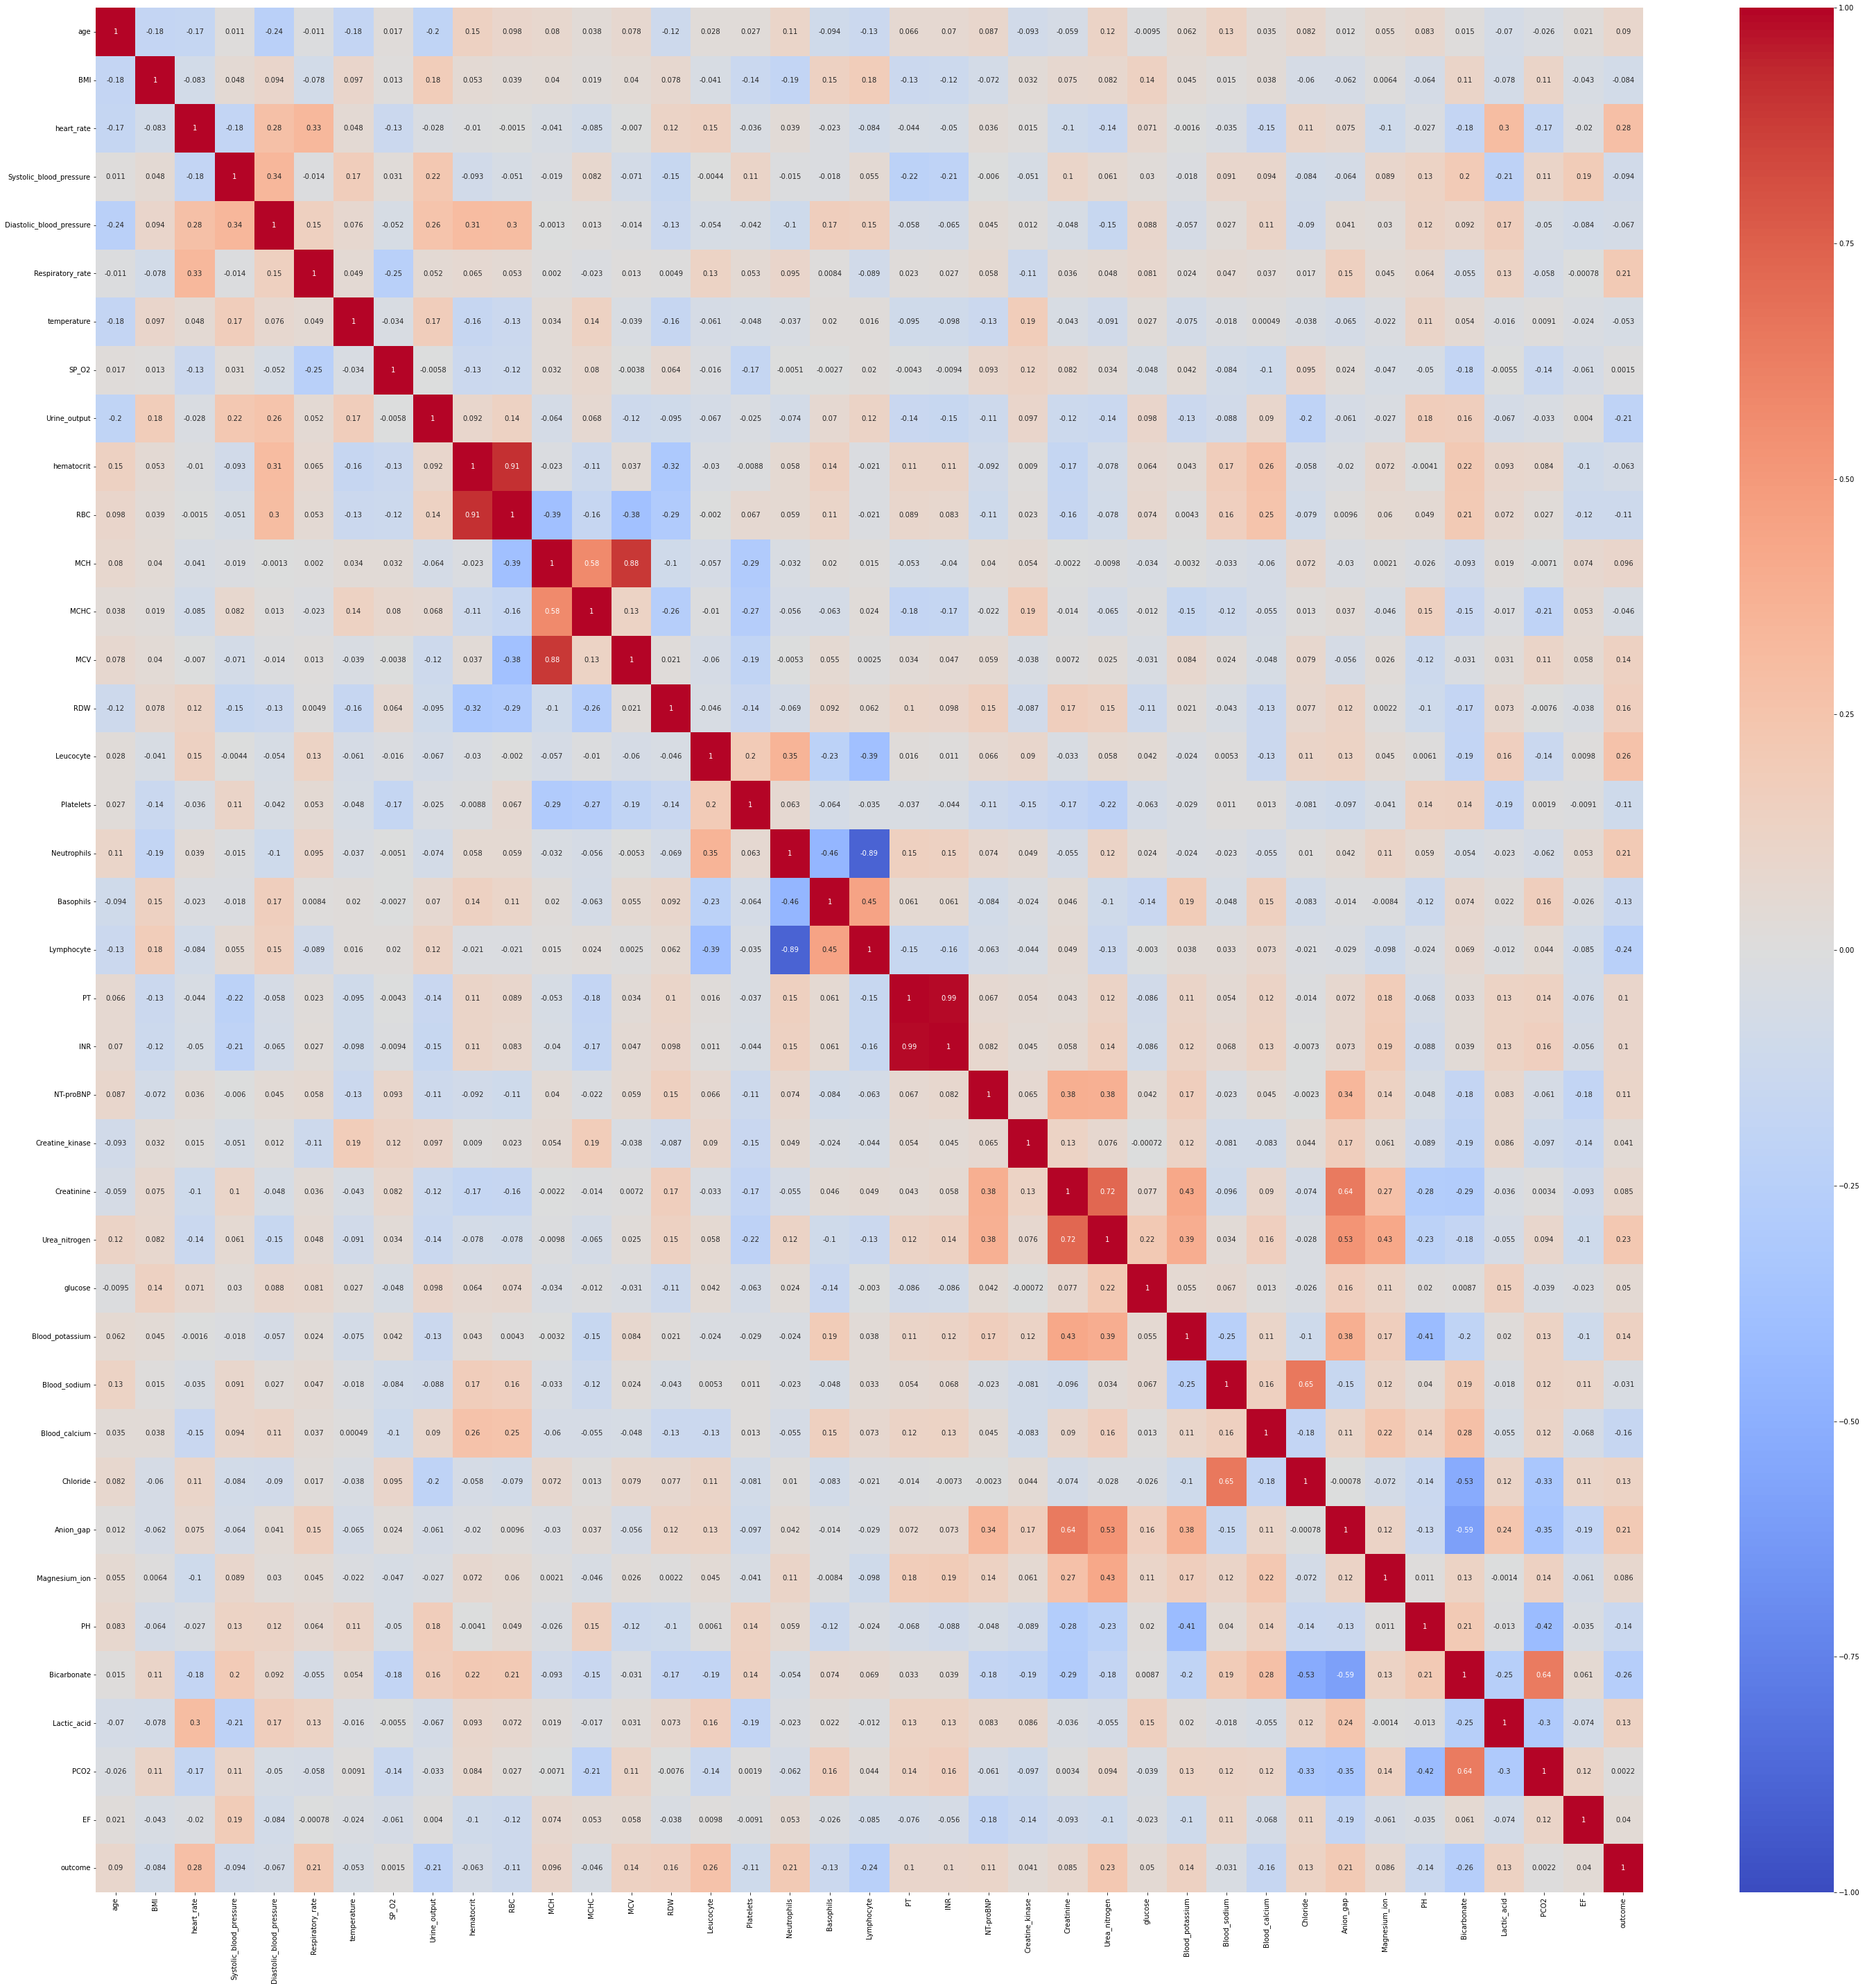

In [30]:
# Heatmap for correlation.
plt.figure(figsize=(50,50))
sns.heatmap(num_df.corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1,center = 0)

## Feature Selection
The input variables that we give to our machine learning models are called features. Each column in our dataset constitutes a feature. To train an optimal model, we need to make sure that we use only the essential ones. If we have too many, the model can capture the unimportant patterns and learn from noise. The method of choosing the important parameters of our data is called Feature Selection. 

__Why Feature Selection?__
Machine learning models follow a simple rule: whatever goes in, comes out. If we put garbage into our model, we can expect the output to be garbage too. In this case, garbage refers to noise in our data. 
To train a model, we collect enormous quantities of data to help the machine learn better. Usually, a good portion of the data collected is noise, while some of the columns of our dataset might not contribute significantly to the performance of our model. Further, having a lot of data can slow down the training process and cause the model to be slower. The model may also learn from this irrelevant data and be inaccurate. In addition, simpler models with less features are subject to less risk of overfitting. 

That's why we must do some feature selection before doing any modeling.

__Standardization:__
In Machine Learning, StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1. StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, in order to standardize the range of functionality of the input dataset.
It is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

In [31]:
#StandardScaler continous features 
sc=StandardScaler()
train_df[list(num_df.drop('outcome',axis=1).columns)] = sc.fit_transform(train_df[list(num_df.drop('outcome',axis=1).columns)])
test_df[list(num_df.drop('outcome',axis=1).columns)] = sc.transform(test_df[list(num_df.drop('outcome',axis=1).columns)])

### Feature Selection using VIF
__What Is a Variance Inflation Factor (VIF)?__
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity.
Variance inflation factor measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables. Variance inflation factors allow for a quick measure of how much a variable is contributing to the standard error in the regression.

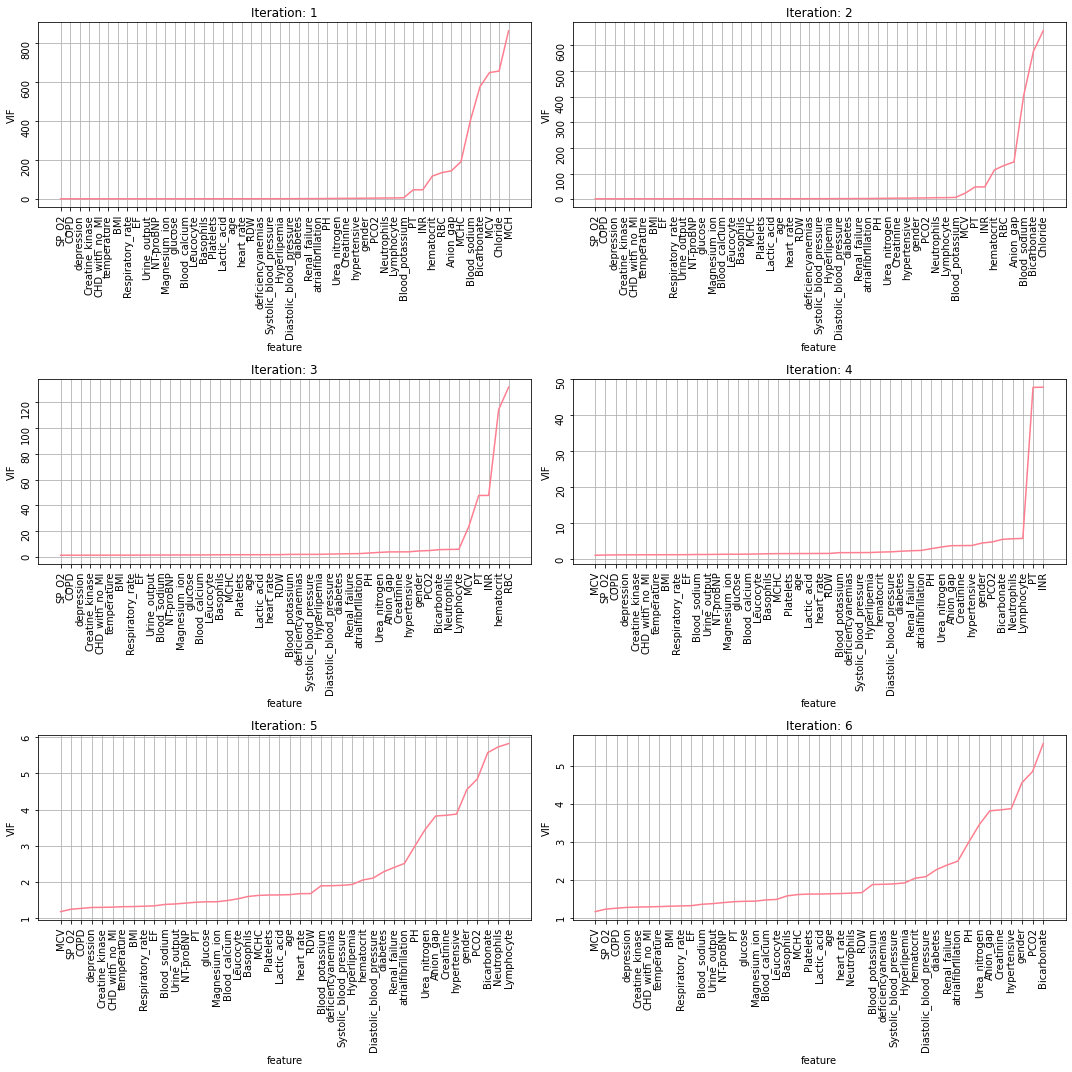

In [32]:
#Define new dataframe for VIF calculations, dropping target variable 
data = train_df.drop(['outcome'],axis=1)

#Define threhold of 5 for VIF, which is the convervative limit for when variables show multicollinearity 
thres = 5

#Counter variables
count = 0
pos = 0

#figures for plotting 
fig, ax = plt.subplots(3,2,figsize=(15,15))
ax = ax.ravel()

#iterative VIF calculations 
while True:
    Cols = range(data.shape[1])
    
    vif = pd.DataFrame([variance_inflation_factor(data.values,i) for i in Cols],columns=['VIF'])
    vif['feature'] = data.columns
    
    if vif['VIF'].max() < thres:
        break
    else:
        Cols = np.delete(Cols, vif['VIF'].idxmax())
        data = data.iloc[:,Cols]
        count+=1
        if count % 1 == 0:
            sns.lineplot(data=vif.sort_values('VIF'),x='feature',y='VIF',ax=ax[pos])
            ax[pos].tick_params(labelrotation=90)
            ax[pos].grid()
            ax[pos].set_title('Iteration: %i' % count)
            pos+=1
            
plt.tight_layout()

In [33]:
# Resultant features after VIF analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1422 non-null   float64 
 1   gender                    1422 non-null   category
 2   BMI                       1422 non-null   float64 
 3   hypertensive              1422 non-null   category
 4   atrialfibrillation        1422 non-null   category
 5   CHD_with_no_MI            1422 non-null   category
 6   diabetes                  1422 non-null   category
 7   deficiencyanemias         1422 non-null   category
 8   depression                1422 non-null   category
 9   Hyperlipemia              1422 non-null   category
 10  Renal_failure             1422 non-null   category
 11  COPD                      1422 non-null   category
 12  heart_rate                1422 non-null   float64 
 13  Systolic_blood_pressure   1422 non-null   float6

In [34]:
# Selected feature for numerical and catagorical.
catlist=list(data.select_dtypes(include='category').columns)
catlist.append('outcome')
numlist=list(data.select_dtypes(exclude='category').columns)
numlist.append('outcome')

# Define categorical and continous dataframes based on VIF results 
cat_df = train_df[catlist]
num_df = train_df[numlist]

In [35]:
# Count of dependent variable.
cat_df['outcome'].value_counts()

0.0    711
1.0    711
Name: outcome, dtype: int64

### Feature Selection using Lasso
Lasso regression will automatically select those features that are useful, discarding the useless or redundant features. In Lasso regression, discarding a feature will make its coefficient equal to 0. So, the idea of using Lasso regression for feature selection purposes is very simple: we fit a Lasso regression on a scaled version of our dataset and we consider only those features that have a coefficient greater than 0.

In [36]:
#Feature Selection using Lasso
x = num_df.loc[:, num_df.columns != 'outcome']
y = num_df['outcome']

lasso_model = linear_model.Lasso(alpha=0.01,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
lasso_model.fit(x, y)

coeff  = lasso_model.coef_
df_coeff = pd.DataFrame({'Features':num_df.columns[1:], 'scores': coeff})

selected_features = (list(df_coeff[df_coeff['scores'] > 0]['Features']))

print("Feature Selection using Lasso")
print(df_coeff.sort_values(by='scores',ascending=False))

Feature Selection using Lasso
                    Features    scores
2    Systolic_blood_pressure  0.119059
13                 Platelets  0.082613
21                   glucose  0.069173
11                       RDW  0.056718
12                 Leucocyte  0.049238
15                 Basophils  0.043986
0                        BMI  0.039739
26             Magnesium_ion  0.034246
5                temperature  0.033872
30                        EF  0.026098
31                   outcome  0.021230
7               Urine_output  0.013454
17                 NT-proBNP  0.011882
23              Blood_sodium  0.011139
29                      PCO2  0.005333
19                Creatinine  0.003469
10                       MCV  0.000000
3   Diastolic_blood_pressure  0.000000
28               Lactic_acid  0.000000
27                        PH  0.000000
4           Respiratory_rate  0.000000
25                 Anion_gap  0.000000
24             Blood_calcium  0.000000
6                      SP_O2  0.00

### Feature selection using Random Forest
Random Forest is a very powerful model both for regression and classification. It can give its own interpretation of feature importance as well, which can be plotted and used for selecting the most informative set of features accordingly, like a Recursive Feature Elimination procedure.
Random Forests are often used for feature selection in a data science workflow. The reason is because the tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node. This means a decrease in impurity over all trees (called gini impurity).

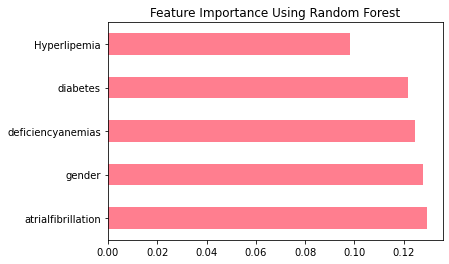

In [37]:
#Feature selection using Random Forest
x=cat_df.loc[:, cat_df.columns != 'outcome']
y = cat_df['outcome']

model = RandomForestClassifier()
model.fit(x,y)

#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance Using Random Forest")
plt.show()

In [38]:
# Selected features
features_random_forest = list(feat_importances.index)
print("Selected Categorical Features")
print(features_random_forest)
print('\n')

print("Selected Numerical Features")
print(selected_features)

# Update cat and num dataframes
cat_df = cat_df[features_random_forest]
cat_df['outcome'] = train_df['outcome']
num_df = num_df[selected_features]
num_df['outcome'] = train_df['outcome']

Selected Categorical Features
['gender', 'hypertensive', 'atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal_failure', 'COPD']


Selected Numerical Features
['BMI', 'Systolic_blood_pressure', 'temperature', 'Urine_output', 'RDW', 'Leucocyte', 'Platelets', 'Basophils', 'NT-proBNP', 'Creatinine', 'glucose', 'Blood_sodium', 'Magnesium_ion', 'PCO2', 'EF', 'outcome']


In [39]:
# Appending outcome variable.
feature = features_random_forest + ['outcome']

In [40]:
# Reduce dimensions of test_df
all_features = features_random_forest + selected_features
test_df = test_df[all_features]
test_cat_df = test_df[feature]
test_num_df = test_df[selected_features]

### Additional EDA
After selecting important features we are again going to look at our pair plot and correlation matrix for a better understanding of our features.

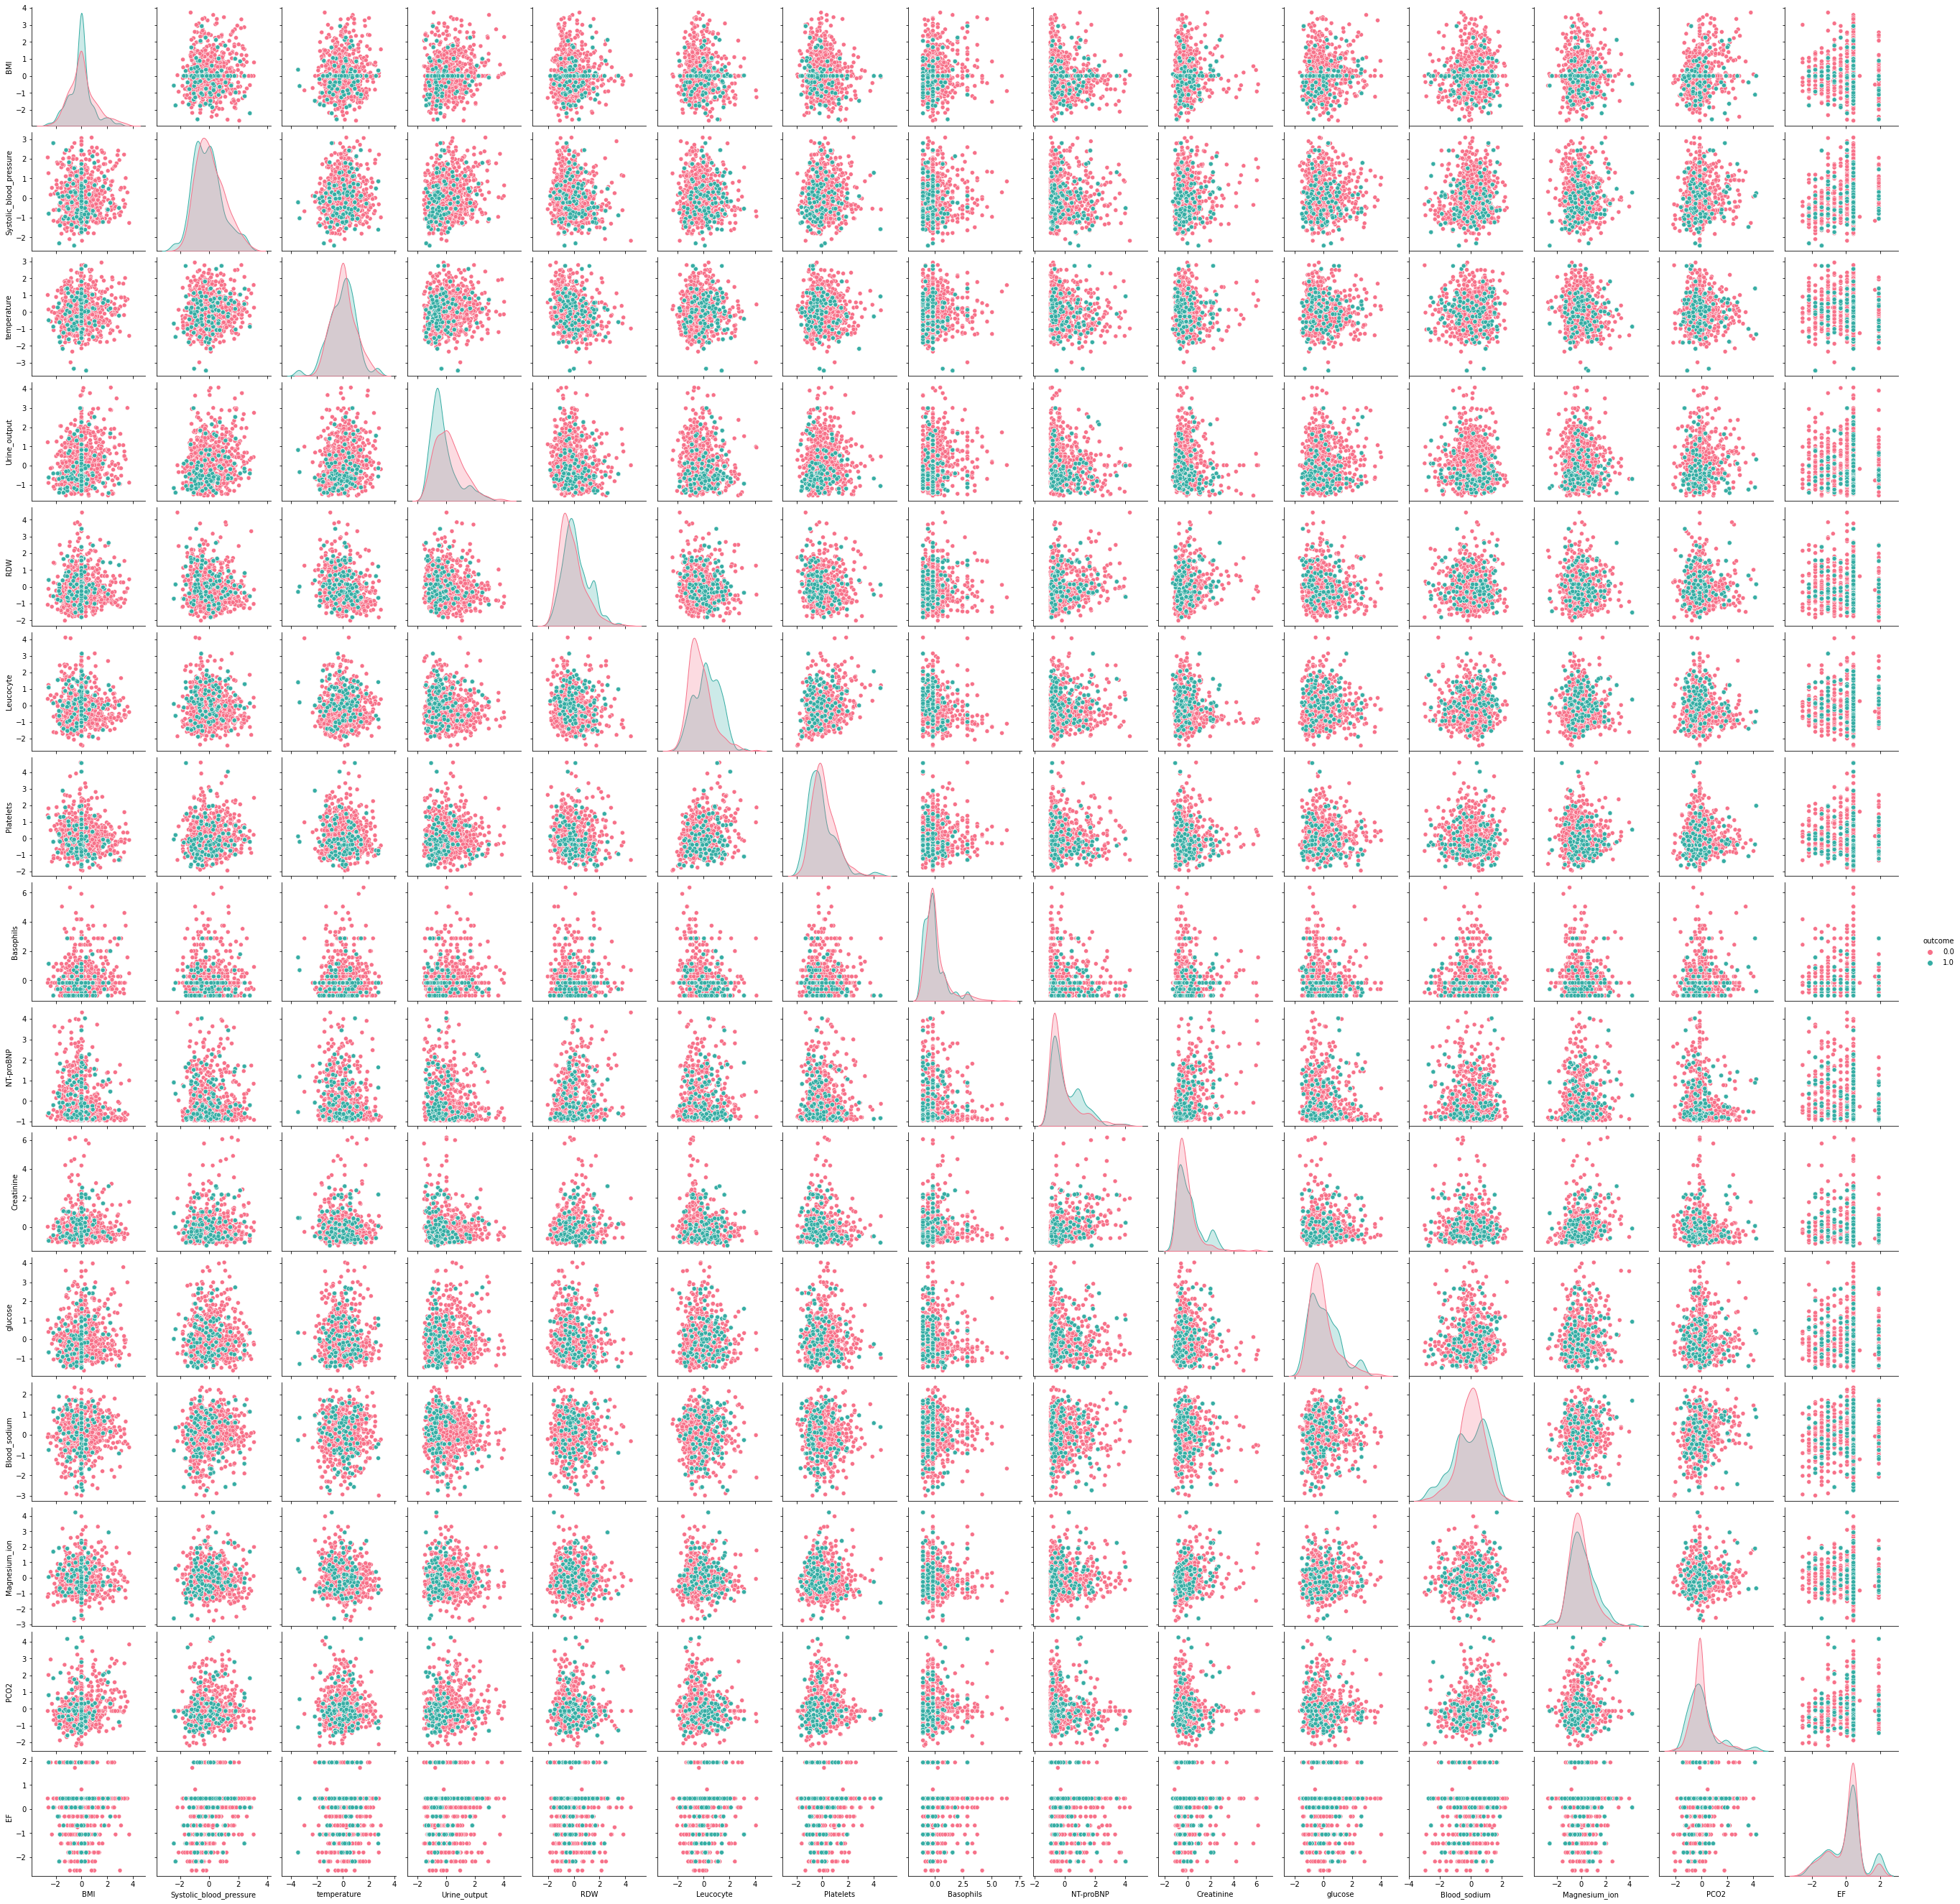

In [41]:
#pairplot after feature selection
sns.pairplot(num_df, hue='outcome')

<AxesSubplot:>

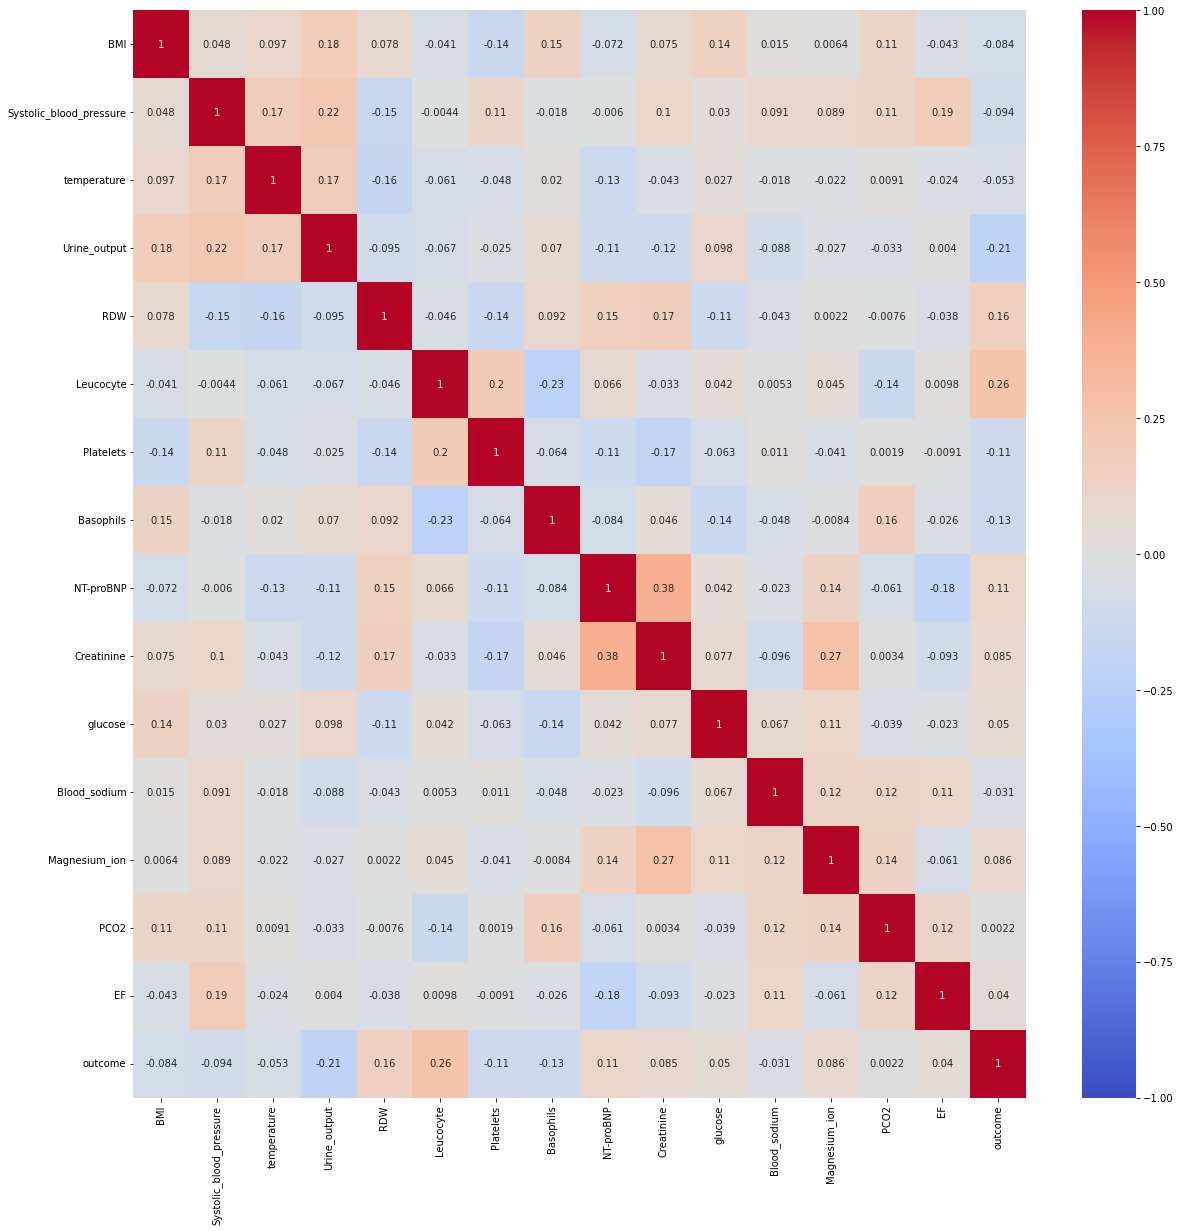

In [42]:
# Heatmap for numerical variable after feature selection
plt.figure(figsize=(20,20))
sns.heatmap(num_df.corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1,center = 0)

## Principal component analysis-PCA

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. Principal component analysis (PCA) is a technique that transforms high-dimensional data into lower-dimensions while retaining as much information as possible. PCA is extremely useful when working with data sets that have a lot of features. 

The first preprocessing step is to divide the dataset into a feature set and corresponding labels

In [43]:
X = num_df.drop(['outcome'], axis=1)
y = num_df['outcome']

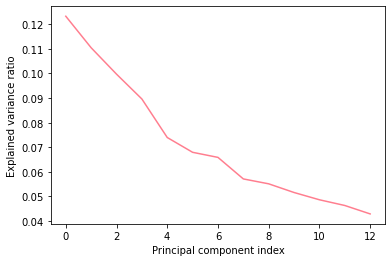

In [44]:
# Checking for how many components should keep
# Build the pipeline
pipe = Pipeline([('reducer', PCA(.90))])

# Fit the pipeline to poke_df and transform the data
pipe.fit(X)
var = pipe['reducer'].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

From this graph after checking elbow point we can say we should keep 6 components. 

In [45]:
# Applying pca
pca = PCA(n_components=6)
X_pca= pca.fit_transform(X)

In [46]:
print(pca.explained_variance_ratio_)

[0.12325393 0.11044283 0.09971865 0.08962272 0.07397488 0.0679595 ]


In [47]:
pca.explained_variance_ratio_.sum()

0.5649725127103751

__Scree Plot:__
In multivariate statistics, a scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA).
Let's plot a Scree Plot which will  explained variance.

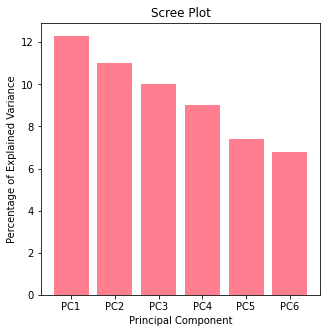

In [48]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt. figure(figsize=(5,5))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [49]:
# This changes the numpy array output back to a DataFrame
X_pc_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6'])

print(X_pc_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.966972  1.782877 -0.952053 -1.405088 -1.621522 -1.099229
1 -2.012096  3.499352  0.531030  2.334477 -1.753157 -0.820873
2 -1.483876  0.197878  0.131047 -0.317830  1.396916  1.403093
3 -0.950295 -1.398700  0.352502  1.029159  0.076503 -0.760649
4 -0.860199  1.807029 -1.555054 -0.279860  1.367071 -0.265036


In [50]:
X1 = test_num_df.drop(['outcome'], axis=1)
y1 = test_num_df['outcome']

# Applying pca into test set
X_pca_test= pca.transform(X1)

## Modeling
A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from the data.
Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions.

### Logistic Regression
Logistic Regression is a statistical approach and a Machine Learning algorithm that is used for classification problems and is based on the concept of probability. It is used when the dependent variable (target) is categorical.
It uses a logit function to model the dependent variable. The dependent variable is dichotomous in nature, i.e. there could only be two possible classes (eg.: either the cancer is malignant or not).

In [51]:
# using PCA data
model = LogisticRegression()
model.fit(X_pc_df.values,y)
predictions = model.predict(X_pca_test)

In [52]:
print('Classification Report: \n', classification_report(y1,predictions))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.68      0.79       185
         1.0       0.17      0.67      0.27        18

    accuracy                           0.67       203
   macro avg       0.56      0.67      0.53       203
weighted avg       0.88      0.67      0.74       203



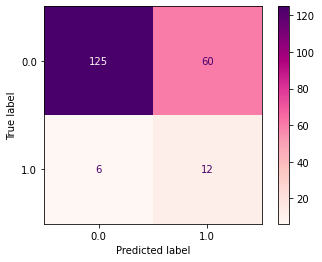

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y1, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot(cmap='RdPu')

plt.show()

## Decision Tree
Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that be can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [54]:
# Pipeline for Decision Tree
step_tree = [('decision_tree', DecisionTreeClassifier())]
tree_pipeline = Pipeline(step_tree)

# Parameters for GridSearchCV
params = {'decision_tree__criterion': ['gini','entropy'],
         'decision_tree__max_depth':range(1,15)}

In [55]:
cv = GridSearchCV(tree_pipeline, param_grid = params)
cv.fit(cat_df.drop('outcome',axis=1).values, cat_df['outcome'].values)

GridSearchCV(estimator=Pipeline(steps=[('decision_tree',
                                        DecisionTreeClassifier())]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': range(1, 15)})

In [56]:
#grid search best parameters and score 
cv.best_params_

{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 12}

In [57]:
#grid search best score
cv.best_score_

0.7756906350382999

In [58]:
#create decision tree model with best parameters from gridsearchcv 
best_tree = DecisionTreeClassifier(criterion = cv.best_params_['decision_tree__criterion'], max_depth = cv.best_params_['decision_tree__max_depth'])
best_tree.fit(cat_df.drop('outcome',axis=1).values, cat_df['outcome'].values)
predictions_tree = best_tree.predict(test_cat_df.drop('outcome',axis=1).values)

In [59]:
# Accuracy Score and Classification report.
print('Classification Report:\n ', classification_report(test_cat_df['outcome'].values, predictions_tree))

Classification Report:
                precision    recall  f1-score   support

         0.0       0.93      0.66      0.77       185
         1.0       0.12      0.50      0.20        18

    accuracy                           0.65       203
   macro avg       0.53      0.58      0.49       203
weighted avg       0.86      0.65      0.72       203



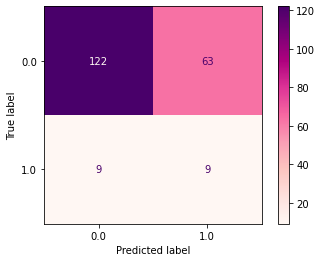

In [60]:
# Confusion matrix
cm = confusion_matrix(test_cat_df['outcome'].values, predictions_tree, labels=best_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_tree.classes_)
disp.plot(cmap='RdPu')

plt.show()

#### LIME
LIME is model-agnostic, meaning that it can be applied to any machine learning model. The technique attempts to understand the model by perturbing the input of data samples and understanding how the predictions change.
LIME provides local model interpretability. LIME modifies a single data sample by tweaking the feature values and observes the resulting impact on the output. Often, this is also related to what humans are interested in when observing the output of a model. 

In [61]:
# Dropping dependent variable.
ct = cat_df.drop('outcome',axis=1)
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(cat_df.drop('outcome',axis=1).values),
    feature_names=ct.columns,
    class_names=['Alive', 'Dead'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=test_cat_df.drop('outcome',axis=1).iloc[2], 
    predict_fn=best_tree.predict_proba
)

exp.show_in_notebook(show_table=True)


# insert explaination for lime restulst 

## KNN
The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.
The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems.

In [62]:
# Pipeline for KNN
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Parameters for GridSearchCV
param_grid_knn = [{
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}]

In [63]:
knn_cv = GridSearchCV(knn_pipeline, param_grid = param_grid_knn,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

In [64]:
# Passing all feature for train set.
X_train = train_df[all_features].drop('outcome',axis=1).values
y_train = train_df[all_features]['outcome'].values

In [65]:
# Model fitting for training set.
knn_cv.fit(X_train, y_train)
predictions_knn = knn_cv.predict(test_df.drop('outcome',axis=1).values)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [66]:
knn_cv.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__n_neighbors': 2,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'distance'}

In [67]:
knn_cv.best_score_

0.9634443021766964

In [68]:
best_grid_knn = knn_cv.best_estimator_
best_grid_knn

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])

In [69]:
print('Accuracy Score: ', accuracy_score(test_df['outcome'].values, predictions_knn))
print('Classification Report:\n ', classification_report(test_df['outcome'].values, predictions_knn))

Accuracy Score:  0.8768472906403941
Classification Report:
                precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       185
         1.0       0.23      0.17      0.19        18

    accuracy                           0.88       203
   macro avg       0.58      0.56      0.56       203
weighted avg       0.86      0.88      0.87       203



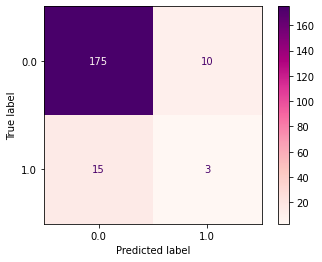

In [70]:
cm = confusion_matrix(test_df['outcome'].values, predictions_knn, labels=best_grid_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_grid_knn.classes_)
disp.plot(cmap='RdPu')

plt.show()

In [71]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   gender              1422 non-null   category
 1   hypertensive        1422 non-null   category
 2   atrialfibrillation  1422 non-null   category
 3   CHD_with_no_MI      1422 non-null   category
 4   diabetes            1422 non-null   category
 5   deficiencyanemias   1422 non-null   category
 6   depression          1422 non-null   category
 7   Hyperlipemia        1422 non-null   category
 8   Renal_failure       1422 non-null   category
 9   COPD                1422 non-null   category
 10  outcome             1422 non-null   float64 
dtypes: category(10), float64(1)
memory usage: 26.3 KB


### Modeling Conclusions

##### Logistic Regression
* Input Features: PCA components resulting from numerical features determined by Lasso feature selection
* Performance 
    * Accuracy - The accuracy of the logistic model is 0.67. This indicates the number of correctly classified outcomes for patients in the test data. 
    * Precision - The precision of the model on class 0 is 0.95 and on class 1 is 0.17. This indicates that the model did significantly better at correctly classifying the positive class 0 datapoints. Out of the the people the model predicted would die, about 17% actually did. 
    * Recall - The recall on class 0 is 0.68 and on class 1 is 0.67. This indicates that the model did equally as well on identifying the actual positive class 0 and 1 labeled datapoints. 
    
* Conclusions:
    * During the preprocessing, we needed to upsample class 1, since it was underrepresented. One logical conclusion to why we perform worse on identifying class 1 is that since we have duplicated a lot of these classes, the model might not be able to correctly classify on different class 1 datapoints for the features selected. In addition, since the class 1 data points are duplicates, if the model incorrectly classified one incorrectly, the duplicates would also be classified incorrectly, which will decrease the precision of class 1. 

##### Decision Tree Classifier
* Input Features: Categorical features selected from the random forest feature selection 
* Performance 
    * Accuracy - The accuracy of the logistic model is 0.65. This indicates the number of correctly classified outcomes for patients in the test data. 
    * Precision - The precision of the model on class 0 is 0.93 and on class 1 is 0.13. This indicates that the model did significantly better at correctly classifying the positive class 0 datapoints. Out of the the people the model predicted would die, about 13% actually did. 
    * Recall - The recall on class 0 is 0.66 and on class 1 is 0.50. This indicates that the model did equally as well on identifying the actual positive class 0 and 1 labeled datapoints. 
    
* Conclusions:
    * In addition to the conclusions drawn from the logistic regression, in regards to the affect of upsampling, it is observed that the decision tree performed similarly to the logistic regression. The main difference is that decision tree does worse at identifying the actual positive class 1 labeled datapints. 


##### K-Nearest Neighbors 
* Input Features: Both categorical and numeric feature selected variables
* Performance 
    * Accuracy - The accuracy of the logistic model is 0.88. This indicates the number of correctly classified outcomes for patients in the test data. 
    * Precision - The precision of the model on class 0 is 0.94 and on class 1 is 0.23. This indicates that the model did significantly better at correctly classifying the positive class 0 datapoints. Out of the the people the model predicted would die, about 23% actually did. 
    * Recall - The recall on class 0 is 0.95 and on class 1 is 0.17. This indicates that the model did better at identifying the actual positive class 0 patients, when compared to class 1. 
    
* Conclusions:
    * The KNN model accuracy is higher than the logistic and decision tree models. This likely is attributed to the additional features being trained on, with the inclusion of both categorical and numeric features. This indicates that there are likely important features in both the categorical and numeric selected features that is not being included in the logistic and tree models, respectively. A logical next step for further analysis would be representing the categorical values as numeric or vice versa either by data transformation or gathering additional data from the population.
    


## Hypothesis testing
Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test. It is used to estimate the relationship between 2 statistical variables.

The Null Hypothesis is the assumption that the event will not occur. A null hypothesis has no bearing on the study's outcome unless it is rejected. H0 is the symbol for it, and it is pronounced H-naught.
The Alternate Hypothesis is the logical opposite of the null hypothesis. The acceptance of the alternative hypothesis follows the rejection of the null hypothesis. H1 is the symbol for it.

The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset. That is, it defines the correlation amongst the grouping categorical data.

 - p < 0.05 — this means the two categorical variables are correlated. The alternate Hypothesis goes as framed below: The variables are associated with each other and happen to have a correlation between the variables.
 - p > 0.05 — this means the two categorical variables are not correlated. The null hypothesis can be framed in the below manner: The grouping variables have no association or correlation amongst them.

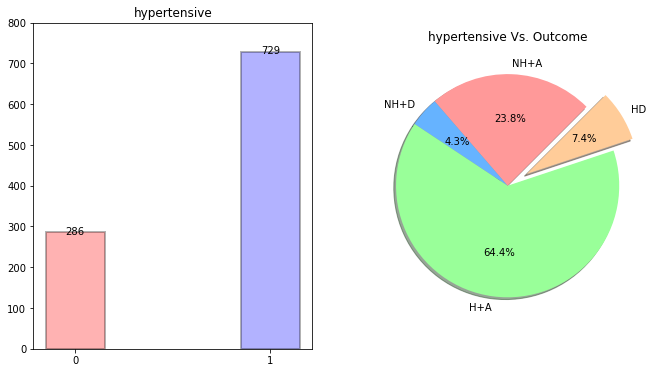

In [99]:
fig, ax = plt.subplots(1,2, figsize=(11,6))

ax[0].bar(df['hypertensive'].unique(), df['hypertensive'].value_counts(sort=False), width=0.3, 
          edgecolor='k', linewidth=2, alpha=0.3, color=['red', 'blue'])
ax[0].set_xticks([0,1])

for x in ax[0].patches:
  ax[0].annotate(format(x.get_height()),
                 (x.get_x()+x.get_width()/2,
                  x.get_height()), ha ='center', va='center',
                 size=10, xytext=(0,1),
                 textcoords='offset points')
  
ax[0].set_ylim(0,800)

ax[0].set_title('hypertensive')

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax[1].pie(df.groupby(['hypertensive', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=['NH+A', 'NH+D', 'H+A', 'HD'], 
          explode=(0,0,0,0.2), startangle=45,colors=colors, shadow=True)
ax[1].set_title('hypertensive Vs. Outcome')
plt.show()

From the Above plot (1 is patients with Hypertension & 0 is Non-Hypertensive patients)

- H+A - Hypertensive +Alive (64.4%)
- H+D - Hypertensive + Death (7.4%)
- NH+A = Non-Hypertensive + Alive (23.3%)
- NH+D = Non-Hypertensive + Death (4.3%)

In [119]:
import researchpy as rp
var, chitest, expected =rp.crosstab(cat_df['outcome'],cat_df['hypertensive'], margins = False, test= "chi-square", cramer_correction= True, expected_freqs=True)
print(var)
print(chitest)
print(expected)

             hypertensive     
hypertensive            0    1
outcome                       
0.0                   191  520
1.0                   245  466
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    9.6455
1                    p-value =    0.0019
2               Cramer's phi =    0.0824
             hypertensive       
hypertensive            0      1
outcome                         
0.0                 218.0  493.0
1.0                 218.0  493.0


__for hypertensive and outcome p value is 0.0019 which is less then 0.05 — this means the two categorical variables are correlated.__ 

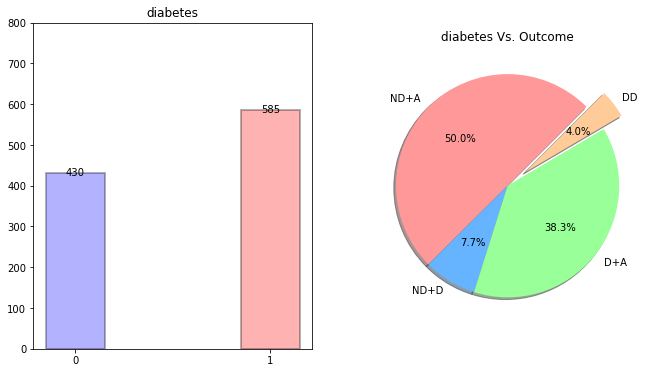

In [104]:
fig, ax = plt.subplots(1,2, figsize=(11,6))

ax[0].bar(df['diabetes'].unique(), df['diabetes'].value_counts(sort=False), width=0.3, 
          edgecolor='k', linewidth=2, alpha=0.3, color=['red', 'blue'])
ax[0].set_xticks([0,1])

for x in ax[0].patches:
  ax[0].annotate(format(x.get_height()),
                 (x.get_x()+x.get_width()/2,
                  x.get_height()), ha ='center', va='center',
                 size=10, xytext=(0,1),
                 textcoords='offset points')
  
ax[0].set_ylim(0,800)

ax[0].set_title('diabetes')

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax[1].pie(df.groupby(['diabetes', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=['ND+A', 'ND+D', 'D+A', 'DD'], 
          explode=(0,0,0,0.2), startangle=45,colors=colors, shadow=True)
ax[1].set_title('diabetes Vs. Outcome')
plt.show()

From the Above graph Bar Plot represent the Diabetes(0 - Patients without Diabetes, 1 - Patients with Diabetes)
 - ND+A = Patients without Diabetes + Alive (50%)
 - ND+D = Patient without Diabetes + Death (7.7%)
 - D+A = Patients with Diabetes + Alive (38.3%)
 - D+D = Patients With Diabetes + Death (4.0%)

In [78]:
var, chitest, expected =rp.crosstab(cat_df['outcome'],cat_df['diabetes'], margins = False, test= "chi-square", cramer_correction= True, expected_freqs=True)
print(var)
print(chitest)
print(expected)

         diabetes     
diabetes        0    1
outcome               
0.0           403  308
1.0           437  274
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    3.3624
1                    p-value =    0.0667
2               Cramer's phi =    0.0486
         diabetes       
diabetes        0      1
outcome                 
0.0         420.0  291.0
1.0         420.0  291.0


__for Diabetes and outcome p value is 0.0667 which is greater then 0.05 — this means the two categorical variables are  not correlated.__ 

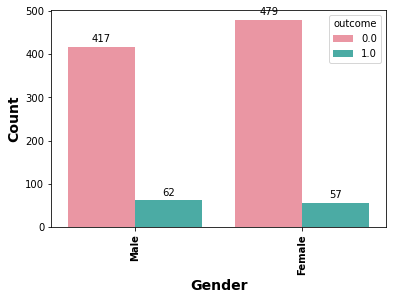

In [111]:
plot = sns.countplot(df['gender'], hue=df['outcome'])
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(np.arange(2), ['Male', 'Female'], rotation='vertical', weight='bold')

for i in plot.patches:
  plot.annotate(format(i.get_height()),
                (i.get_x() + i.get_width()/2,
                 i.get_height()), ha='center', va='center',
                size=10, xytext=(0,8),
                textcoords='offset points') 

plt.show()

The Above graph represents the Gender Distribution 1 indicates Male patients (i.e. 479) 2 indicates Female patients (i.e. 536)
 - Out of 479 male patients 62 were died and reminaing 417 patients were alive (14.3% is the death %)
 - out of 536 Female patients 479 patients were alive and 57 patients were died (i.e. 12.8%)
 - out of all patients 47.5% are male patients and 52.5% patients were Female patients

In [115]:
var, chitest, expected =rp.crosstab(cat_df['outcome'],cat_df['gender'], margins = False, test= "chi-square", cramer_correction= True, expected_freqs=True)
print(var)
print(chitest)
print(expected)

        gender     
gender       1    2
outcome            
0.0        340  371
1.0        351  360
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.3406
1                    p-value =    0.5595
2               Cramer's phi =    0.0155
        gender       
gender       1      2
outcome              
0.0      345.5  365.5
1.0      345.5  365.5


__for Gender and outcome p value is 0.5595 which is greater then 0.05 — this means the two categorical variables are not correlated.__ 